# このテキストについて

テキストの目的
- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

どのように学ぶか  
- 定番のデータセットを通じて、分類問題を解く流れやライブラリの使い方を学びます。

In [1]:
# 警告非表示
import warnings
warnings.filterwarnings('ignore')

# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [3]:
from sklearn.datasets import load_iris

# インスタンスを生成
data = load_iris()

# データをDataFrame型でXに格納する。
X = pd.DataFrame(data.data, columns=['sepal_length',
                                     'sepal_width',
                                     'petal_length',
                                     'petal_width'])
# 目的変数も同様にyに格納する。
y = pd.DataFrame(data.target, columns=['Species'])

# X,yを結合
df = pd.concat([X, y], axis=1) # axis=1 列方向に結合

df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# virgicolorとvirginica, sepal_lengthとpetal_lengthでデータを抜き出す。
df = df[['sepal_length', 'petal_length', 'Species']]
df = df[df['Species']!=0]
df['Species'] -= 1 # ({0: virgicolor, 1: virginica})
df = df.reset_index(drop=True)
df.head()

,sepal_length,petal_length,Species
0,7.0,4.7,0
1,6.4,4.5,0
2,6.9,4.9,0
3,5.5,4.0,0
4,6.5,4.6,0


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

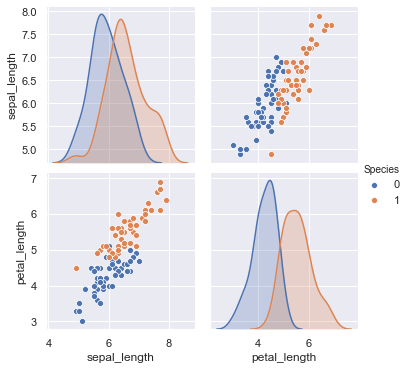

In [5]:
# 散布図を描画する
sns.pairplot(df, hue='Species');

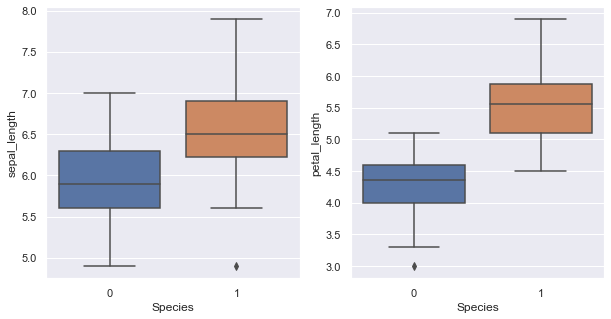

In [6]:
# 箱ひげ図を描画する
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x='Species', y='sepal_length', data=df)
plt.subplot(122)
sns.boxplot(x='Species', y='petal_length', data=df);

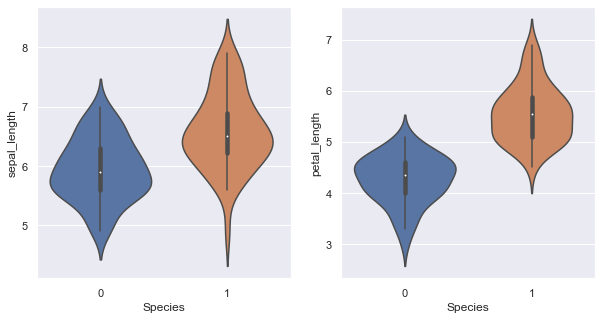

In [7]:
# バイオリン図を描画する
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.violinplot(x='Species', y='sepal_length', data=df)
plt.subplot(122)
sns.violinplot(x='Species', y='petal_length', data=df);

# 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [8]:
from sklearn.model_selection import train_test_split

# 特徴量Xをndarrayに変換
X = df.iloc[:, :2].values
# 目的変数yをndarrayに変換
y = df.iloc[:, -1].values

# 訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
print(X.shape, y.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 2) (100,)
(75, 2) (25, 2)
(75,) (25,)


# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std[:5]

array([[-1.77029021, -2.29778941],
       [ 0.03817879, -0.24187257],
       [-0.56464421,  0.24187257],
       [ 0.18888454,  0.84655399],
       [-0.11252696, -0.12093628]])

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

In [11]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [1, 3, 5]
for i in n_neighbors:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_std, y_train)
    print(str(i) + '-nn')
    print(neigh.predict(X_test_std))
print('y_test')
print(y_test)

1-nn
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0]
3-nn
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0]
5-nn
[0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0]
y_test
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


# 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

### scikit-learnを使い4種類の指標を計算する

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)
y_true = y_test

In [13]:
# Accuracy（正解率）
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.92
23


In [14]:
# Precision（適合率）
from sklearn.metrics import precision_score

print(precision_score(y_true, y_pred, average='macro'))
print(precision_score(y_true, y_pred, average='micro'))
print(precision_score(y_true, y_pred, average='weighted'))
print(precision_score(y_true, y_pred, average=None))

y_tru = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print(precision_score(y_true, y_pred, average=None))
print(precision_score(y_true, y_pred, average=None, zero_division=1))

0.9285714285714286
0.92
0.9314285714285714
[1.         0.85714286]
[1.         0.85714286]
[1.         0.85714286]


In [15]:
# Recall（再現率）
from sklearn.metrics import recall_score

print(recall_score(y_true, y_pred))
print(recall_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='micro'))
print(recall_score(y_true, y_pred, average='weighted'))
print(recall_score(y_true, y_pred, average=None))

y_tru = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print(recall_score(y_true, y_pred, average=None))
print(recall_score(y_true, y_pred, average=None, zero_division=1))

1.0
0.9230769230769231
0.92
0.92
[0.84615385 1.        ]
[0.84615385 1.        ]
[0.84615385 1.        ]


In [16]:
# F値
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

y_tru = [0, 0, 0, 0, 0, 0]
y_pre = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)

0.9198717948717948
0.92
0.9197435897435898
[0.91666667 0.92307692]


0.923076923076923

### 混同行列をscikit-learnを使い表示する

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[11,  2],
       [ 0, 12]])

### 4種類の指標値の意味について

混同行列（confusion matrix）はクラス分類問題の結果を「実際のクラス」と「予測したクラス」を軸にしてまとめたもの。  
二値分類（2クラス分類）においては実際のクラスと予測したクラスの組み合わせによって、結果を以下の4種類に分けることができる。
- 真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）
- 真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）
- 偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）
- 偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）

これを行列にしたものが混同行列。以下のように表される。

![画像](https://gyazo.com/f759d66f34d74b8aada8a4e9d27d7610.gng)  


#### ＜正解率（accuracy）＞  
すべてのサンプルのうち正解したサンプルの割合。

$$
accuracy=\frac{TP+TN}{TP+TN+FP+FN}
$$

#### ＜適合率（precision）＞  
陽性と予測されたサンプルのうち正解したサンプルの割合。PPV（positive predictive value）とも呼ばれる。  
FP（偽陽性）が大きくなると適合率は小さくなる。偽陽性を避けたい（抑えたい）場合に指標として用いる。
$$
precision=\frac{TP}{TP+FP}
$$


#### ＜再現率（recall）＞  
実際に陽性のサンプルのうち正解したサンプルの割合。sensitivityやhit rate, TPR（true positive rate, 真陽性率）などとも呼ばれる。  
FN（偽陰性）が大きくなると再現率は小さくなる。偽陰性を避けたい（抑えたい）場合に指標として用いる。
$$
recall=\frac{TP}{TP+FN}
$$


#### ＜F値（F-measure）＞  
適合率と再現率の調和平均。
$$
F-measure=\frac{2 \times TP}{2 \times TP+FP+FN}
$$

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [19]:
# 1-nn
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)

# 3-nn
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)

# 5-nn
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)

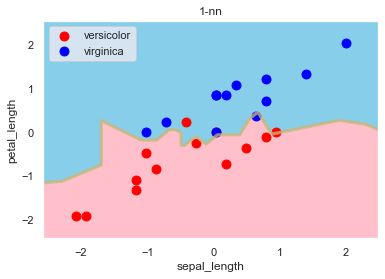

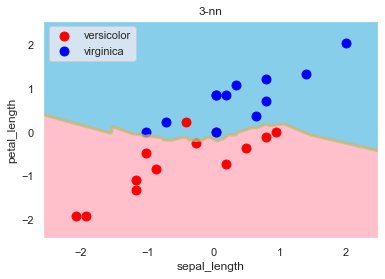

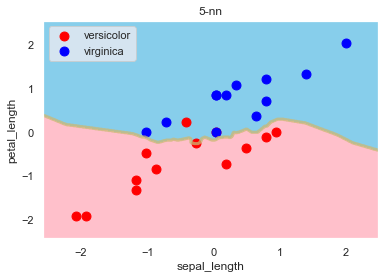

In [20]:
decision_region(X_test_std, y_test, model1, step=0.01, title='1-nn', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

decision_region(X_test_std, y_test, model3, step=0.01, title='3-nn', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

decision_region(X_test_std, y_test, model5, step=0.01, title='5-nn', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

In [21]:
# 各指標値を入れる辞書を作成
pre_dict = {}

### 最近傍法

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 学習
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

# 推定
knn_pred = knn.predict(X_test_std)

# 評価
knn_pre = []
knn_pre.append(accuracy_score(y_test, knn_pred))
knn_pre.append(precision_score(y_test, knn_pred))
knn_pre.append(recall_score(y_test, knn_pred))
knn_pre.append(f1_score(y_test, knn_pred))
pre_dict['KNeighborsClassifier'] = knn_pre

### ロジスティック回帰

In [23]:
from sklearn.linear_model import LogisticRegression

# 学習
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

# 推定
lr_pred = lr.predict(X_test_std)

# 評価
lr_pre = []
lr_pre.append(accuracy_score(y_test, lr_pred))
lr_pre.append(precision_score(y_test, lr_pred))
lr_pre.append(recall_score(y_test, lr_pred))
lr_pre.append(f1_score(y_test, lr_pred))
pre_dict['LogisticRegression'] = lr_pre

### SVM

In [24]:
from sklearn.svm import SVC

# 学習
svc = SVC(random_state=0)
svc.fit(X_train_std, y_train)

# 推定
svc_pred = svc.predict(X_test_std)

# 評価
svc_pre = []
svc_pre.append(accuracy_score(y_test, svc_pred))
svc_pre.append(precision_score(y_test, svc_pred))
svc_pre.append(recall_score(y_test, svc_pred))
svc_pre.append(f1_score(y_test, svc_pred))
pre_dict['SVC'] = svc_pre

### 決定木

In [25]:
from sklearn.tree import DecisionTreeClassifier

# 学習
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_std, y_train)

# 推定
dt_pred = dt.predict(X_test_std)

# 評価
dt_pre = []
dt_pre.append(accuracy_score(y_test, dt_pred))
dt_pre.append(precision_score(y_test, dt_pred))
dt_pre.append(recall_score(y_test, dt_pred))
dt_pre.append(f1_score(y_test, dt_pred))
pre_dict['DecisionTreeClassifier'] = dt_pre

### ランダムフォレスト

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 学習
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_std, y_train)

# 推定
rf_pred = rf.predict(X_test_std)

# 評価
rf_pre = []
rf_pre.append(accuracy_score(y_test, rf_pred))
rf_pre.append(precision_score(y_test, rf_pred))
rf_pre.append(recall_score(y_test, rf_pred))
rf_pre.append(f1_score(y_test, rf_pred))
pre_dict['RandomForestClassifier'] = rf_pre

### 可視化と考察

最近傍法


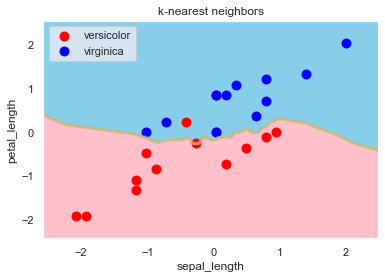

[[10  3]
 [ 0 12]]
-------------------------------------------
ロジスティック回帰


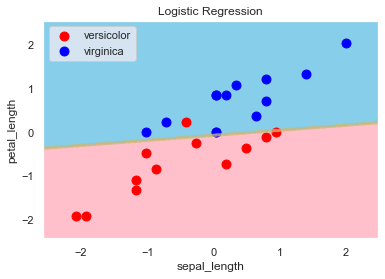

[[11  2]
 [ 0 12]]
-------------------------------------------
SVC


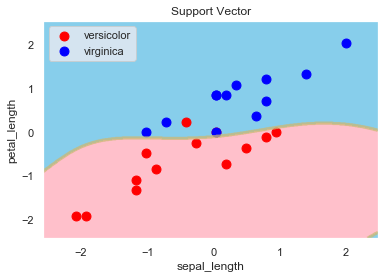

[[11  2]
 [ 0 12]]
-------------------------------------------
決定木


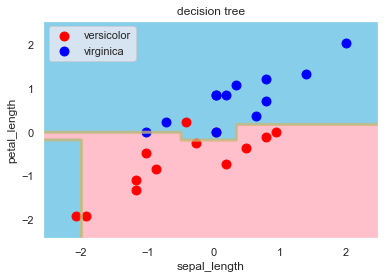

[[10  3]
 [ 0 12]]
-------------------------------------------
ランダムフォレスト


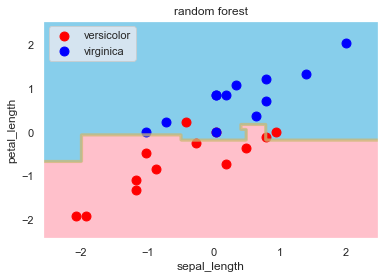

[[10  3]
 [ 0 12]]


,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.880000,0.920000,0.920000,0.880000,0.880000
precision,0.800000,0.857143,0.857143,0.800000,0.800000
recall,1.000000,1.000000,1.000000,1.000000,1.000000
f-measure,0.888889,0.923077,0.923077,0.888889,0.888889


In [27]:
# 可視化
print('最近傍法')
decision_region(X_test_std, y_test, knn, step=0.01,
                title='k-nearest neighbors', xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
print(confusion_matrix(y_test, knn_pred))
print('-------------------------------------------')

print('ロジスティック回帰')
decision_region(X_test_std, y_test, lr, step=0.01,
                title='Logistic Regression', xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
print(confusion_matrix(y_test, lr_pred))
print('-------------------------------------------')

print('SVC')
decision_region(X_test_std, y_test, svc, step=0.01,
                title='Support Vector', xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
print(confusion_matrix(y_test, svc_pred))
print('-------------------------------------------')

print('決定木')
decision_region(X_test_std, y_test, dt, step=0.01,
                title='decision tree', xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
print(confusion_matrix(y_test, dt_pred))
print('-------------------------------------------')

print('ランダムフォレスト')
decision_region(X_test_std, y_test, rf, step=0.01,
                title='random forest', xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
print(confusion_matrix(y_test, rf_pred))

# 指標値を表にまとめる
display(pd.DataFrame(pre_dict, index=['accuracy', 'precision', 'recall', 'f-measure']))

### 考察
全てのモデルで陰性（virgicolor）を陽性（virginica）と誤って分類する傾向にあった。  
ロジスティック回帰とSVCが４つ全て同じ指標値、そして、残り３つのモデルが同じ指標値を残した。  
今回のケースでは、ロジスティック回帰とSVCがモデルの選択として適していたと言える。  


決定領域について  
- 最近傍法とSVCが曲線的に2分割
- ロジスティック回帰が直線的に2分割
- 決定木は直線で領域を選びながら3分割
- ランダムフォレストは領域を選びながら2分割

# 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [28]:
# 問題8を関数化
pre_dict2 = {}
def models(model, model_name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    print('----------------------------------------------')
    print(model_name)
    # 学習
    clf = model()
    clf.fit(X_train, y_train)
    
    # 推定
    clf_pred = clf.predict(X_test)
    
    # 評価
    clf_pre = []
    clf_pre.append(accuracy_score(y_test, clf_pred))
    clf_pre.append(precision_score(y_test, clf_pred))
    clf_pre.append(recall_score(y_test, clf_pred))
    clf_pre.append(f1_score(y_test, clf_pred))
    pre_dict2[model_name] = clf_pre
    
    decision_region(X_test, y_test, clf, step=0.01,
                title=model_name, xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])
    print(confusion_matrix(y_test, clf_pred))

----------------------------------------------
KNeighborsClassifier


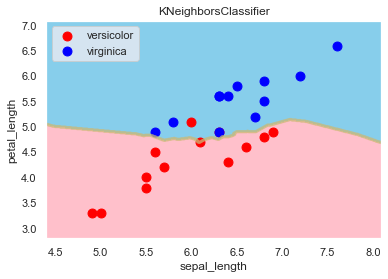

[[11  2]
 [ 0 12]]
----------------------------------------------
LogisticRegression


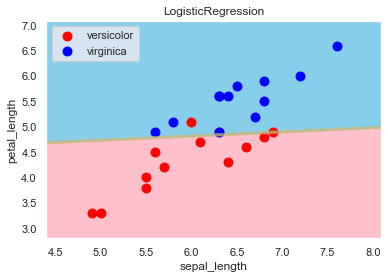

[[10  3]
 [ 0 12]]
----------------------------------------------
SVC


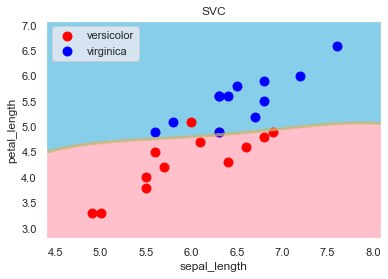

[[11  2]
 [ 0 12]]
----------------------------------------------
DecisionTreeClassifier


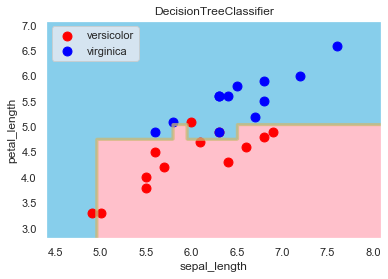

[[10  3]
 [ 0 12]]
----------------------------------------------
RandomForestClassifier


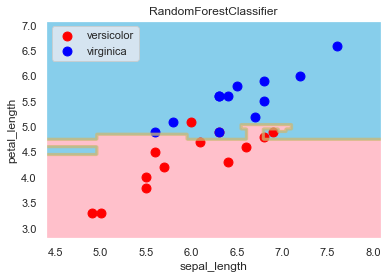

[[ 9  4]
 [ 0 12]]


In [29]:
models(KNeighborsClassifier, 'KNeighborsClassifier')
models(LogisticRegression, 'LogisticRegression')
models(SVC, 'SVC')
models(DecisionTreeClassifier, 'DecisionTreeClassifier')
models(RandomForestClassifier, 'RandomForestClassifier')

### 標準化の有無の考察

In [30]:
print('【標準化】')
display(pd.DataFrame(pre_dict, index=['accuracy', 'precision', 'recall', 'f-measure']))
print('【非標準化】')
display(pd.DataFrame(pre_dict2, index=['accuracy', 'precision', 'recall', 'f-measure']))

【標準化】


,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.880000,0.920000,0.920000,0.880000,0.880000
precision,0.800000,0.857143,0.857143,0.800000,0.800000
recall,1.000000,1.000000,1.000000,1.000000,1.000000
f-measure,0.888889,0.923077,0.923077,0.888889,0.888889


【非標準化】


,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.920000,0.880000,0.920000,0.880000,0.840000
precision,0.857143,0.800000,0.857143,0.800000,0.750000
recall,1.000000,1.000000,1.000000,1.000000,1.000000
f-measure,0.923077,0.888889,0.923077,0.888889,0.857143


ロジスティック回帰とランダムフォレストが精度を落とし、最近傍法の精度が向上した。  
決定領域からランダムフォレストが過学習ぎみになり、特に精度を落とした。  
SVCと決定木は標準化が依存していない。  
このことから、標準化は手法を選んで最適化する必要があることがわかった。  

# 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。  
決定領域を可視化する前述の関数は適切に書き換える必要があります

In [31]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# インスタンスを生成
data = load_iris()

# データをDataFrame型でXに格納する。
X = pd.DataFrame(data.data, columns=['sepal_length',
                                     'sepal_width',
                                     'petal_length',
                                     'petal_width'])
# 目的変数も同様にyに格納する。
y = pd.DataFrame(data.target, columns=['Species'])

# X,yを結合
multi_value = pd.concat([X, y], axis=1) # axis=1 列方向に結合

multi_value = multi_value[['sepal_length', 'petal_length', 'Species']]

# 特徴量 X
X = multi_value.iloc[:, :-1]
# 目的変数 y
y = multi_value.iloc[:, -1]

# 訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [32]:
def multi_value_models(model, model_name, X_train=X_train_std, X_test=X_test_std, y_train=y_train, y_test=y_test):
    print('----------------------------------------------')
    print(model_name)
    # 学習
    clf = model()
    clf.fit(X_train, y_train)
    
    # 推定
    clf_pred = clf.predict(X_test)
    
    # 評価
    print(classification_report(y_test, clf_pred))
    print(confusion_matrix(y_test, clf_pred))
    
    multi_decision_region(X_test, y_test, clf, step=0.01,
                title=model_name, xlabel='sepal_length', ylabel='petal_length',
                target_names=['setosa', 'versicolor', 'virginica'])

In [33]:
# 可視化関数を多値に適応させる
def multi_decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'greenyellow']
    n_class = 3
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                   np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1],
                    s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

----------------------------------------------
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


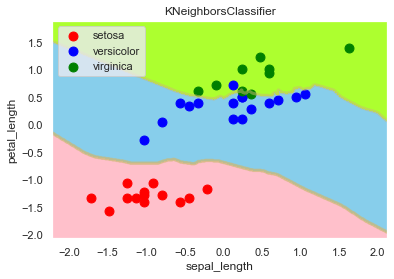

----------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38

[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


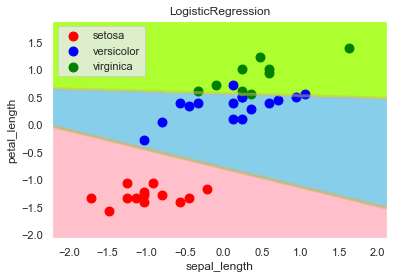

----------------------------------------------
SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


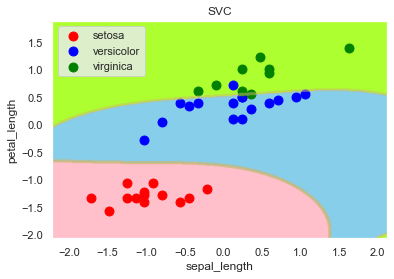

----------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


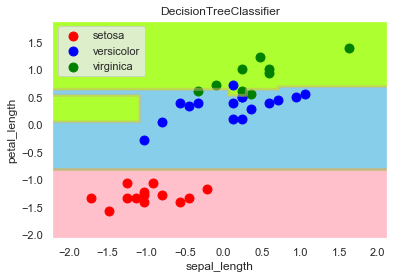

----------------------------------------------
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


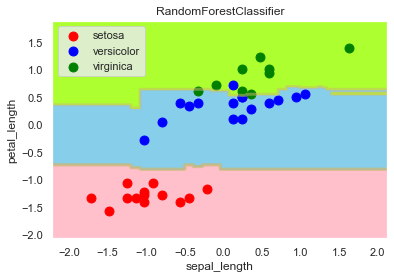

In [34]:
multi_value_models(KNeighborsClassifier, 'KNeighborsClassifier')
multi_value_models(LogisticRegression, 'LogisticRegression')
multi_value_models(SVC, 'SVC')
multi_value_models(DecisionTreeClassifier, 'DecisionTreeClassifier')
multi_value_models(RandomForestClassifier, 'RandomForestClassifier')

正解率では最近傍法、ロジスティック回帰、SVCが同率で優れており、決定領域からSVCが最も綺麗に分類できている。